In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r'Downloads/mov_ds/movie_profit.csv')
df.head()

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,1,6/22/2007,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy
1,2,7/28/1995,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action
2,3,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure
3,4,12/25/2013,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action
4,5,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action


In [3]:
df.columns

Index(['Unnamed: 0', 'release_date', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'distributor', 'mpaa_rating',
       'genre'],
      dtype='object')

In [4]:
df.drop(columns={'Unnamed: 0'},inplace=True)
#dropping unwanted columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       3401 non-null   object 
 1   movie              3401 non-null   object 
 2   production_budget  3401 non-null   float64
 3   domestic_gross     3401 non-null   float64
 4   worldwide_gross    3401 non-null   float64
 5   distributor        3353 non-null   object 
 6   mpaa_rating        3264 non-null   object 
 7   genre              3401 non-null   object 
dtypes: float64(3), object(5)
memory usage: 212.7+ KB


In [6]:
df.isna().sum()
#to find the null values

release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
distributor           48
mpaa_rating          137
genre                  0
dtype: int64

In [7]:
df.dropna(inplace =True)
#to drop the null values

In [8]:
df.isna().sum().sum()

0

In [9]:
df.duplicated().sum()

0

In [82]:
df.corr()

C:\Users\91751\AppData\Local\Temp\ipykernel_844\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,production_budget,domestic_gross,worldwide_gross,profit,released_year
production_budget,1.000000,0.565257,0.649771,0.469014,0.134444
domestic_gross,0.565257,1.000000,0.923725,0.911635,-0.064725
worldwide_gross,0.649771,0.923725,1.000000,0.976091,0.035319
profit,0.469014,0.911635,0.976091,1.000000,0.002592
released_year,0.134444,-0.064725,0.035319,0.002592,1.000000


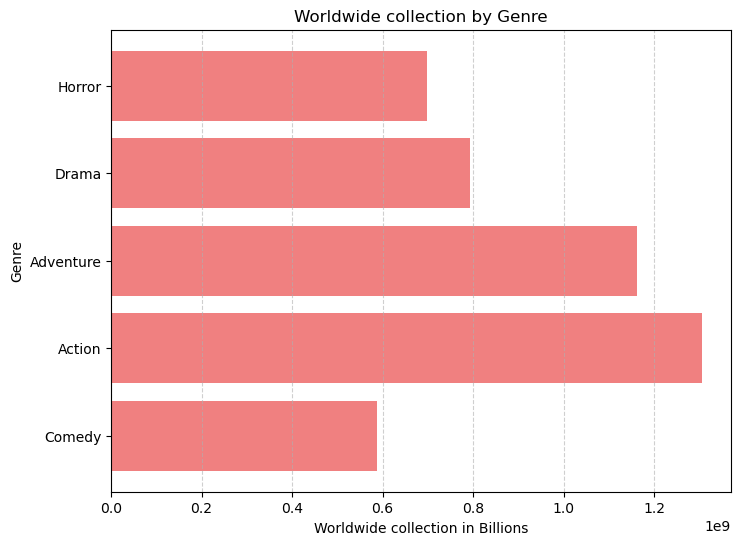

In [83]:
x = df['genre']
y = df['worldwide_gross']

plt.figure(figsize = (8,6))
plt.barh(x,y,color = 'lightcoral')
plt.xlabel('Worldwide collection in Billions')
plt.ylabel('Genre')
plt.title('Worldwide collection by Genre')
plt.grid(axis='x', linestyle='--', alpha=0.6)

In [11]:
df['profit'] = df['worldwide_gross'] - df['production_budget']
df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,profit
0,6/22/2007,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy,-8.686710e+05
1,7/28/1995,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action,8.924622e+07
2,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure,-3.504929e+07
3,12/25/2013,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action,-2.328318e+07
4,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action,1.134866e+09


In [12]:
df.nlargest(10,'profit')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,profit
4,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action,1.134866e+09
426,7/10/2015,Minions,74000000.0,336045770.0,1.162782e+09,Universal,PG,Adventure,1.088782e+09
545,6/11/1993,Jurassic Park,63000000.0,395708305.0,1.038813e+09,Universal,PG-13,Action,9.758126e+08
392,6/30/2017,Despicable Me 3,75000000.0,264624300.0,1.034521e+09,Universal,PG,Adventure,9.595209e+08
149,5/19/1999,Star Wars Ep. I: The Phantom Menace,115000000.0,474544677.0,1.027045e+09,20th Century Fox,PG,Adventure,9.120447e+08
380,6/15/1994,The Lion King,79300000.0,421785283.0,9.863323e+08,Walt Disney,G,Adventure,9.070323e+08
387,7/3/2013,Despicable Me 2,76000000.0,368065385.0,9.752168e+08,Universal,PG,Adventure,8.992168e+08
253,12/20/2017,Jumanji: Welcome to the Jungle,90000000.0,404508916.0,9.617585e+08,Sony Pictures,PG-13,Adventure,8.717585e+08
39,3/4/2016,Zootopia,150000000.0,341268248.0,1.019707e+09,Walt Disney,PG,Adventure,8.697066e+08
440,5/19/2004,Shrek 2,70000000.0,441226247.0,9.370081e+08,Dreamworks SKG,PG,Adventure,8.670081e+08


<Axes: xlabel='movie'>

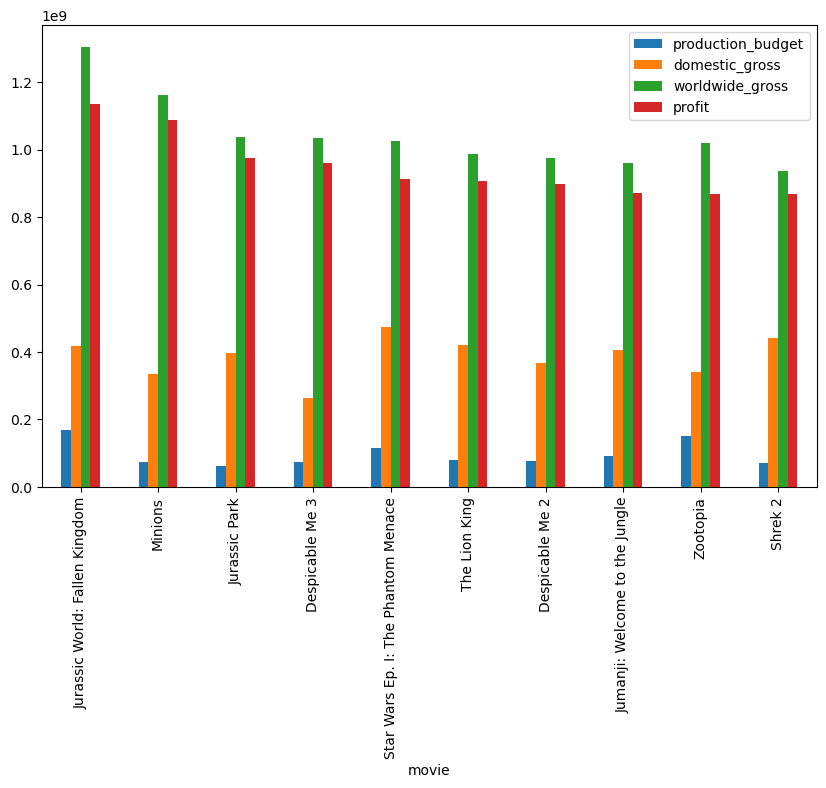

In [13]:
most_profitable = df.nlargest(10,'profit')
most_profitable.set_index('movie',inplace=True)


most_profitable.plot(kind='bar',figsize = (10,6))

Text(0, 0.5, 'No of movies released')

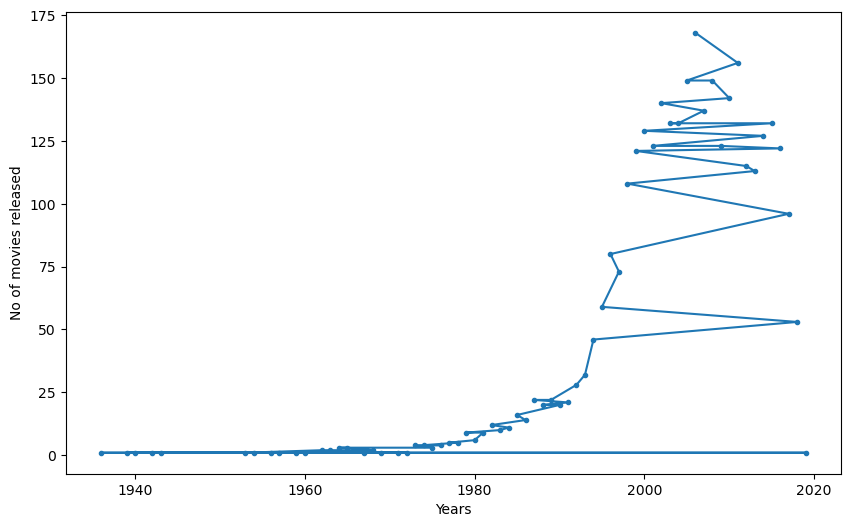

In [73]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['released_year'] = df['release_date'].dt.year

plt.figure(figsize=(10,6))
plt.plot(df['released_year'].value_counts(),marker='.')
plt.xlabel('Years')
plt.ylabel('No of movies released')

#this shows that the number of movies released increased drastically from the 1980's to the 2000's and shows slight increase most of the time after 2000

In [15]:
df['distributor'].value_counts().nlargest(5)

Warner Bros.          363
Sony Pictures         333
Universal             283
20th Century Fox      272
Paramount Pictures    257
Name: distributor, dtype: int64

<Axes: >

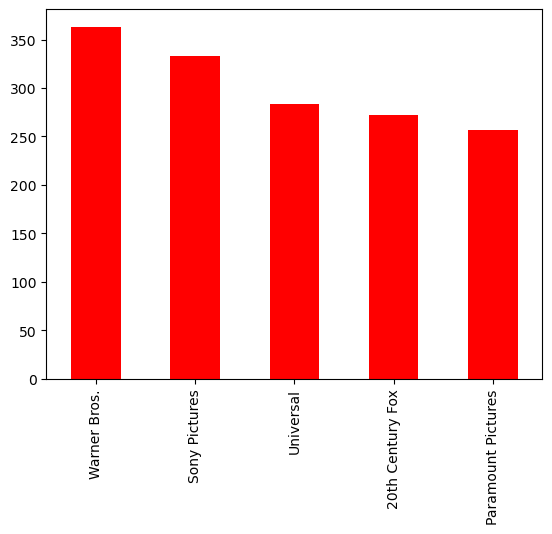

In [39]:
df['distributor'].value_counts().nlargest(5).plot(kind='bar',color = 'red')
# this graph shows the major distributors who releases the most number of movies

Text(0, 0.5, 'No of movies')

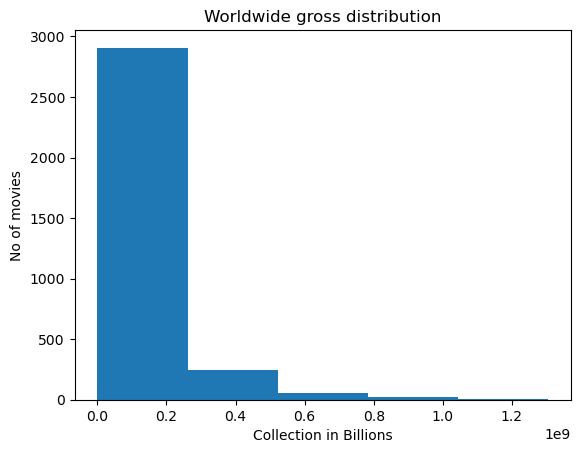

In [74]:
plt.hist(df['worldwide_gross'],bins=5)
plt.title('Worldwide gross distribution')
plt.xlabel('Collection in Billions')
plt.ylabel('No of movies')

<Axes: >

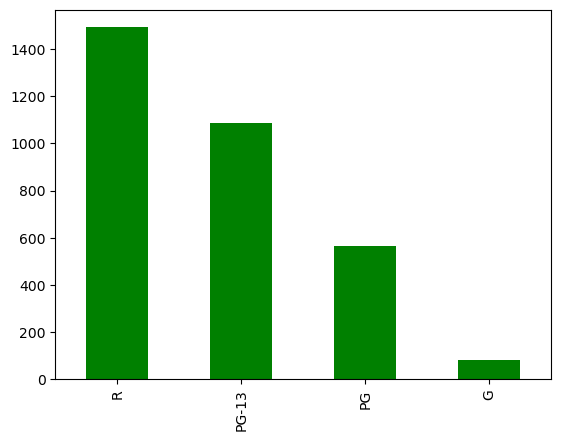

In [17]:
df.mpaa_rating.value_counts().plot(kind='bar',color = 'green')

In [18]:
dist_grp = df.groupby('distributor')

In [19]:
Universalgrp = dist_grp.get_group('Universal')
Universalgrp['production_budget'].mean()

48686544.169611305

<Axes: ylabel='genre'>

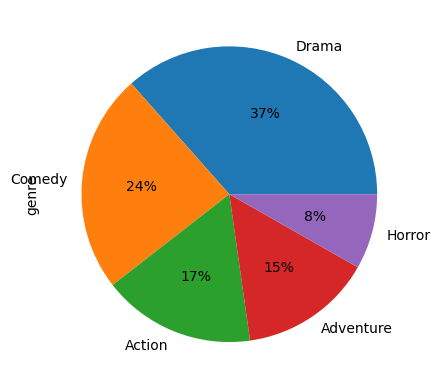

In [20]:
df['genre'].value_counts().plot(kind='pie',autopct='%1.f%%')

In [21]:
genre_grp = df.groupby('genre')
genre_grp['profit'].mean().sort_values(ascending=False)

# we can see that 'Adventure' genre movies generate more mean profit followed by 'Action' genre.

genre
Adventure    1.424320e+08
Action       9.846412e+07
Horror       5.486805e+07
Comedy       4.223335e+07
Drama        3.292998e+07
Name: profit, dtype: float64

In [43]:
dist_grp['production_budget'].mean().nlargest(5).sort_values(ascending=False)

# we can see that on average 20th Century Fox studio spends more on the production budget

distributor
20th Century Fox      5.182978e+07
Warner Bros.          5.084363e+07
Dreamworks SKG        5.047045e+07
Walt Disney           5.046648e+07
Paramount Pictures    4.952471e+07
Name: production_budget, dtype: float64

In [44]:
dist_grp['profit'].sum().nlargest(5)

#20th Century fox has earned the highest amount of profit money 

distributor
20th Century Fox      3.287614e+10
Universal             3.221817e+10
Warner Bros.          2.975990e+10
Paramount Pictures    2.459408e+10
Sony Pictures         2.336436e+10
Name: profit, dtype: float64

In [24]:
dist_grp['profit'].mean().nlargest(5)

# RKO Radio Pictures get the most average profit followed by Columbia pictures

distributor
RKO Radio Pictures    1.752710e+08
Columbia              1.411389e+08
Well Go USA           1.213010e+08
20th Century Fox      1.208682e+08
Universal             1.138451e+08
Name: profit, dtype: float64

Text(0.5, 1.0, 'Top Avg Profit Distributors')

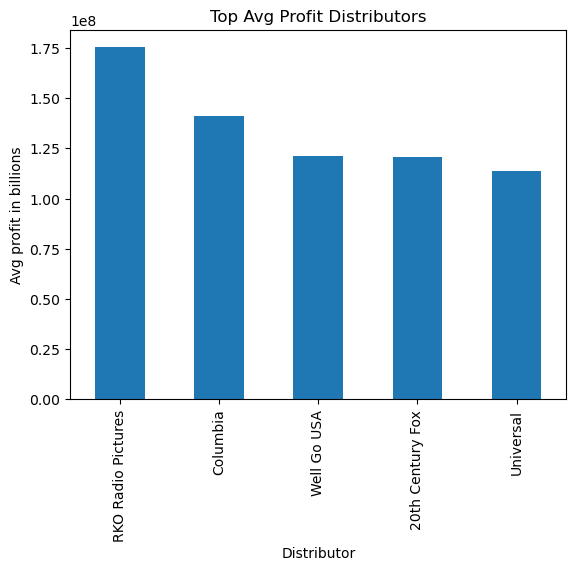

In [25]:
dist_grp['profit'].mean().nlargest(5).plot(kind='bar')
plt.xlabel('Distributor')
plt.ylabel('Avg profit in billions')
plt.title('Top Avg Profit Distributors')

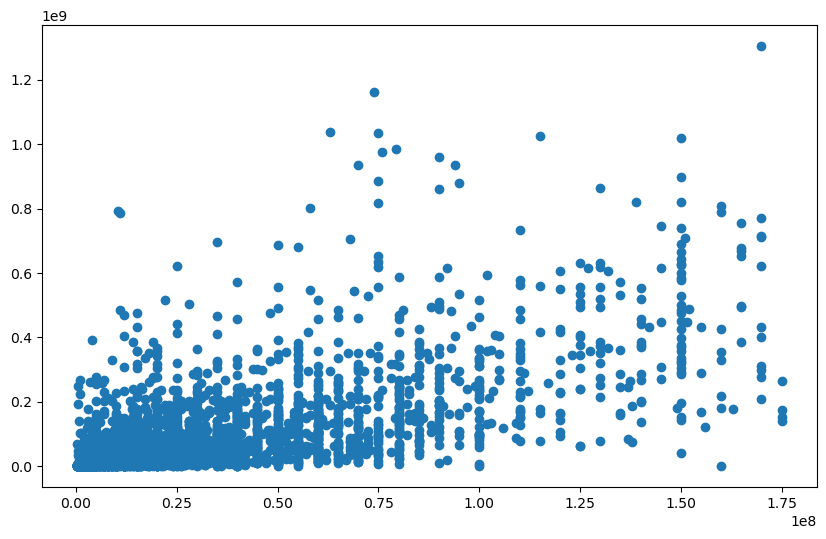

In [76]:
#now let us create a scatterplot to check if there is any relationship between production_budget and gross collection
plt.figure(figsize=(10,6))
plt.scatter(df['production_budget'],df['worldwide_gross'])

# we cannot find any major linear relation between production_budget and worldwide gross. If there is any relation , it is very less.

In [35]:
rating_grp = df.groupby('mpaa_rating')
rating_grp['worldwide_gross'].sum().sort_values(ascending = False)

#here we are grouping the data on ratings and we can see that PG-13 movies has got the highest worldwide collection

mpaa_rating
PG-13    1.260457e+11
R        9.553910e+10
PG       8.138569e+10
G        1.491664e+10
Name: worldwide_gross, dtype: float64

In [46]:
df.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,profit,released_year
0,2007-06-22,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy,-8.686710e+05,2007
1,1995-07-28,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action,8.924622e+07,1995
2,2017-05-12,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure,-3.504929e+07,2017
3,2013-12-25,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action,-2.328318e+07,2013
4,2018-06-22,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action,1.134866e+09,2018
5,2014-08-01,Guardians of the Galaxy,170000000.0,333172112.0,7.710513e+08,Walt Disney,PG-13,Action,6.010513e+08,2014
6,2010-05-07,Iron Man 2,170000000.0,312433331.0,6.211564e+08,Paramount Pictures,PG-13,Action,4.511564e+08,2010
7,2014-04-04,Captain America: The Winter Soldier,170000000.0,259746958.0,7.144019e+08,Walt Disney,PG-13,Action,5.444019e+08,2014
8,2014-07-11,Dawn of the Planet of the Apes,170000000.0,208545589.0,7.106446e+08,20th Century Fox,PG-13,Adventure,5.406446e+08,2014
9,2004-11-10,The Polar Express,170000000.0,186493587.0,3.106342e+08,Warner Bros.,G,Adventure,1.406342e+08,2004


In [62]:
df[['movie','genre','worldwide_gross']].sort_values(by='worldwide_gross',ascending=False).head(10)

,movie,genre,worldwide_gross
4,Jurassic World: Fallen Kingdom,Action,1.304866e+09
426,Minions,Adventure,1.162782e+09
545,Jurassic Park,Action,1.038813e+09
392,Despicable Me 3,Adventure,1.034521e+09
149,Star Wars Ep. I: The Phantom Menace,Adventure,1.027045e+09
39,Zootopia,Adventure,1.019707e+09
380,The Lion King,Adventure,9.863323e+08
387,Despicable Me 2,Adventure,9.752168e+08
253,Jumanji: Welcome to the Jungle,Adventure,9.617585e+08
440,Shrek 2,Adventure,9.370081e+08


In [65]:
biggest_flops = df.nsmallest(10,'profit')
biggest_flops

#these are the biggest flops according to this dataset

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,profit,released_year
30,2018-12-21,Aquaman,160000000.0,0.0,0.0,Warner Bros.,PG-13,Action,-160000000.0,2018
69,2011-03-11,Mars Needs Moms,150000000.0,21392758.0,39549758.0,Walt Disney,PG,Adventure,-110450242.0,2011
228,2019-03-15,Wonder Park,100000000.0,0.0,0.0,Paramount Pictures,PG,Adventure,-100000000.0,2019
226,2002-08-16,The Adventures of Pluto Nash,100000000.0,4411102.0,7094995.0,Warner Bros.,PG-13,Comedy,-92905005.0,2002
281,2017-04-21,The Promise,90000000.0,8224288.0,10551417.0,Open Road,PG-13,Drama,-79448583.0,2017
379,2005-09-02,A Sound of Thunder,80000000.0,1900451.0,6300451.0,Warner Bros.,PG-13,Action,-73699549.0,2005
251,1995-12-22,Cutthroat Island,92000000.0,10017322.0,18517322.0,MGM,PG-13,Adventure,-73482678.0,1995
425,2001-02-23,Monkeybone,75000000.0,5409517.0,5409517.0,20th Century Fox,PG-13,Comedy,-69590483.0,2001
132,2017-01-13,Monster Trucks,125000000.0,33370166.0,61642798.0,Paramount Pictures,PG-13,Adventure,-63357202.0,2017
133,1999-08-27,The 13th Warrior,125000000.0,32698899.0,61698899.0,Walt Disney,R,Action,-63301101.0,1999
